In [1]:
import pandas as pd
import seaborn as sns
#import numpy as np

# Leitura do arquivo de boletins
boletins = pd.read_csv('db.csv', decimal=',', sep=';')	

# Leitura do arquivo de alunos
#alunos = pd.read_csv('alunos.csv', decimal=',', sep=';')

In [2]:
boletins

,ano,periodo,estudante,disciplina,ch,tipo,anp,aulas,faltas,justificadas,...,nb4,ms2,nr2,mr2,ma,nef,mf,resultado,resultado_ano,situacao_atual
0,2013,2,1E3F43B5,BIOLOGIA,80,RG,-,80,4,-,...,64,73,-,73,73,-,74,AP,Aprovado,Concluído
1,2013,2,1E3F43B5,CIÊNCIAS DOS MATERIAIS,80,RG,-,80,-,-,...,79,78,-,78,79,-,79,AP,Aprovado,Concluído
2,2013,2,1E3F43B5,EDUCAÇÃO FÍSICA,80,RG,-,80,-,-,...,82,74,-,74,69,-,69,AP,Aprovado,Concluído
3,2013,2,1E3F43B5,ELETRICIDADE,80,RG,-,80,6,-,...,72,71,-,71,70,-,70,AP,Aprovado,Concluído
4,2013,2,1E3F43B5,FILOSOFIA,40,RG,-,40,1,-,...,77,85,-,85,86,-,86,AP,Aprovado,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18173,2020,1,FE4DF1AA,MATEMÁTICA,120,RG,116,4,-,-,...,86,86,-,86,80,-,80,AP,Aprovado,Matriculado
18174,2020,1,FE4DF1AA,METROLOGIA,80,RG,70,10,2,-,...,73,81,-,81,77,-,77,AP,Aprovado,Matriculado
18175,2020,1,FE4DF1AA,PROCESSOS DE FABRICAÇÃO,80,RG,71,8,-,-,...,72,80,-,80,77,-,77,AP,Aprovado,Matriculado
18176,2020,1,FE4DF1AA,QUÍMICA,80,RG,80,-,-,-,...,100,100,-,100,83,-,83,AP,Aprovado,Matriculado


In [3]:
planilha_analise = pd.DataFrame(
    columns=[
        'ano', 
        'periodo',
        'estudante', 
        'ira_nb1', 
        'ira_mr1', 
        'ira_nb3', 
        'rec_s1', 
        'rec_s2', 
        'qtd_disciplinas', 
        'ap', 
        'ac', 
        'rt', 
        'rf',
        'resultado_final',
        'situacao_atual'
    ]
)

anos_boletim = boletins['ano'].unique()

for ano in anos_boletim:
    alunos_ano = boletins[boletins['ano']==ano]['estudante'].unique()
    
    for aluno in alunos_ano:
        
        boletim_individual = boletins[(boletins['estudante']==aluno) & (boletins['ano']==ano)]
        periodo = int(boletim_individual[boletim_individual['estudante']==aluno]['periodo'].mode())

        # Lista com ano, estudante, ira no 1ºbim, ira após recuperação, ira após 3º bim, 
        #           qtd de recuperações no 1º sem, qtd de recuperações no 2º sem,
        #           qtd de disciplinas, aprovações, aprovações em conselho, retenções por nota, 
        #           retenções por falta 
        # calcula a quantidade de disciplinas
        
        qtd_disciplinas = len(boletim_individual)
        # calcula o IRA no 1º bimestre
        ira1 = pd.to_numeric(boletim_individual['nb1'], errors='coerce').fillna(0).mean().round(2)
        # calcula a soma das notas após a recuperação
        mr1_soma = pd.to_numeric(boletim_individual['mr1'], errors='coerce').fillna(0).sum()
        # calcula o IRA após a recuperação
        ira2 = (mr1_soma / qtd_disciplinas).round(2)        
        # calcula o soma das notas após o 3º bimestre
        nb3_soma = pd.to_numeric(boletim_individual['nb3'], errors='coerce').fillna(0).sum()
        # calcula o IRA após o 3º bimestre
        ira3 = ( (2*mr1_soma/3+ nb3_soma/3) / qtd_disciplinas).round(2)
        # calcula a quantidade de recuperações do 1º semestre
        rec_s1 = (pd.to_numeric(boletim_individual['ms1'], errors='coerce').fillna(0) < 60).sum(),
        # calcula a quantidade de recuperações do 2º semestre
        rec_s2 =  (pd.to_numeric(boletim_individual['ms2'], errors='coerce').fillna(0) < 60).sum(),
        ap = (boletim_individual['resultado']=='AP').sum(),
        ac = (boletim_individual['resultado']=='AC').sum(),
        rt= (boletim_individual['resultado']=='RT').sum(),
        rf = (boletim_individual['resultado']=='RF').sum(),
        resultado_ano = boletim_individual[boletim_individual['estudante']==aluno]['resultado_ano']
        situacao_atual = boletim_individual[boletim_individual['estudante']==aluno]['situacao_atual']

        
        linha = [
            ano,
            periodo,
            aluno,
            ira1,
            ira2,
            ira3,
            float(rec_s1[0]),
            float(rec_s2[0]),
            qtd_disciplinas,
            float(ap[0]), 
            float(ac[0]), 
            float(rt[0]), 
            float(rf[0]),
            resultado_ano.values[0],
            situacao_atual.values[0]
        ]

        planilha_analise.loc[len(planilha_analise)] = linha
        #planilha_analise.index = planilha_analise.index - 1
        #planilha_analise.sort_index(ascending=False,inplace=True)
        #planilha_analise.reset_index(drop=True,inplace=True)
#planilha_analise.sort_values(by=['matricula', 'ano'], ascending=[True, True], inplace=True)
#planilha_analise.reset_index(drop=True, inplace=True)
#planilha_analise.to_csv('analise.csv', sep=';', decimal=',', index=False)

for i in planilha_analise.index:
    if ((planilha_analise.loc[i, 'resultado_final']=='Aprovado')
        & 
        (planilha_analise.loc[i, 'rec_s2'] + planilha_analise.loc[i, 'rec_s1'] == 0)):
            planilha_analise.loc[i, 'grupo'] = 'A'
    if ((planilha_analise.loc[i, 'resultado_final']=='Aprovado')
        &
        (planilha_analise.loc[i, 'ac'] + planilha_analise.loc[i, 'rt'] + planilha_analise.loc[i, 'rf'] == 0)
        &
        (planilha_analise.loc[i, 'rec_s1'] + planilha_analise.loc[i, 'rec_s2'] > 0)):
            planilha_analise.loc[i, 'grupo'] = 'B'
    if ((planilha_analise.loc[i, 'resultado_final']=='Aprovado') 
        & 
        (planilha_analise.loc[i, 'ac'] + planilha_analise.loc[i, 'rt'] > 0)):
            planilha_analise.loc[i, 'grupo'] = 'C'
    if ((planilha_analise.loc[i, 'resultado_final']=='Reprovado') 
        & 
        (planilha_analise.loc[i, 'rf'] <= 3)):
            planilha_analise.loc[i, 'grupo'] = 'D'
    if ((planilha_analise.loc[i, 'resultado_final']=='Reprovado') 
        & 
        (planilha_analise.loc[i, 'rf'] > 3)):
            planilha_analise.loc[i, 'grupo'] = 'E'

# Alunos que não ficaram de recuperação no ano
grupo_a = planilha_analise[planilha_analise['grupo']=='A']
# Alunos aprovados direto, com pelo menos uma recuperação no ano
grupo_b = planilha_analise[planilha_analise['grupo']=='B']
# Alunos aprovados em conselho
grupo_c = planilha_analise[planilha_analise['grupo']=='C']
# Alunos reprovados
grupo_d = planilha_analise[planilha_analise['grupo']=='D']
# Alunos reprovados por falta
grupo_e = planilha_analise[planilha_analise['grupo']=='E']

planilha_analise

,ano,periodo,estudante,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf,resultado_final,situacao_atual,grupo
0,2013,2,1E3F43B5,66.40,71.67,71.27,3.0,0.0,15,15.0,0.0,0.0,0.0,Aprovado,Concluído,B
1,2013,3,834ACD28,68.83,71.92,72.31,0.0,0.0,12,12.0,0.0,0.0,0.0,Aprovado,Concluído,A
2,2013,3,E7AAEDC6,65.42,64.25,65.19,3.0,1.0,12,11.0,0.0,1.0,0.0,Aprovado,Transferido Externo,C
3,2013,3,64E8060D,70.42,71.25,72.00,2.0,0.0,12,12.0,0.0,0.0,0.0,Aprovado,Concluído,B
4,2013,3,0F8AAB02,65.33,69.92,70.67,2.0,0.0,12,12.0,0.0,0.0,0.0,Aprovado,Concluído,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2020,1,0AE66D11,52.50,62.50,66.08,7.0,8.0,16,16.0,0.0,0.0,0.0,Aprovado,Matriculado,B
1140,2020,1,79616288,46.88,48.50,49.96,10.0,11.0,16,4.0,0.0,12.0,0.0,Reprovado,Transferido Externo,D
1141,2020,1,04583447,29.19,32.19,25.38,15.0,15.0,16,0.0,0.0,16.0,0.0,Reprovado,Transferido Externo,D
1142,2020,1,ACE171F2,33.19,39.00,42.56,16.0,9.0,16,3.0,0.0,13.0,0.0,Reprovado,Transferido Externo,D


In [5]:
planilha_analise.to_csv('planilha_analise.csv', index=False)

In [5]:
planilha_analise[['ano', 'estudante', 'grupo']]

,ano,estudante,grupo
0,2013,1E3F43B5,B
1,2013,834ACD28,A
2,2013,E7AAEDC6,C
3,2013,64E8060D,B
4,2013,0F8AAB02,B
...,...,...,...
1139,2020,0AE66D11,B
1140,2020,79616288,D
1141,2020,04583447,D
1142,2020,ACE171F2,D


In [6]:
db2 = pd.merge(boletins, planilha_analise[['ano', 'estudante', 'grupo']],  how='left', left_on=['ano','estudante'], right_on = ['ano','estudante'])

In [7]:
db2.to_csv('db3.csv', sep=';', decimal=',', index=False)

In [8]:
db2.loc[(db2['situacao_atual']!='Concluído') & (db2['situacao_atual']!='Matriculado'), 'situacao_atual'] = 'Evadido'

In [9]:
pd.to_numeric(db2.loc[3,'percentual'], errors='coerce').round(2) # .replace('.', ',')
#db2['percentual']

7.5

In [10]:
db2[db2['situacao_atual']!='Concluído']

,ano,periodo,estudante,disciplina,ch,tipo,anp,aulas,faltas,justificadas,...,ms2,nr2,mr2,ma,nef,mf,resultado,resultado_ano,situacao_atual,grupo
69,2013,3,E7AAEDC6,EDUCAÇÃO FÍSICA,80,RG,-,83,-,-,...,72,-,72,71,-,71,AP,Aprovado,Evadido,C
70,2013,3,E7AAEDC6,ELEMENTO DE MÁQUINAS,120,RG,-,115,16,-,...,67,-,67,66,-,66,AP,Aprovado,Evadido,C
71,2013,3,E7AAEDC6,ELETRÔNICA,80,RG,-,80,3,-,...,75,-,75,65,-,65,AP,Aprovado,Evadido,C
72,2013,3,E7AAEDC6,FILOSOFIA,40,RG,-,40,1,-,...,79,-,79,84,-,84,AP,Aprovado,Evadido,C
73,2013,3,E7AAEDC6,FÍSICA,80,RG,-,81,4,-,...,70,-,70,65,-,65,AP,Aprovado,Evadido,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18173,2020,1,FE4DF1AA,MATEMÁTICA,120,RG,116,4,-,-,...,86,-,86,80,-,80,AP,Aprovado,Matriculado,B
18174,2020,1,FE4DF1AA,METROLOGIA,80,RG,70,10,2,-,...,81,-,81,77,-,77,AP,Aprovado,Matriculado,B
18175,2020,1,FE4DF1AA,PROCESSOS DE FABRICAÇÃO,80,RG,71,8,-,-,...,80,-,80,77,-,77,AP,Aprovado,Matriculado,B
18176,2020,1,FE4DF1AA,QUÍMICA,80,RG,80,-,-,-,...,100,-,100,83,-,83,AP,Aprovado,Matriculado,B


In [11]:
db2.columns

Index(['ano', 'periodo', 'estudante', 'disciplina', 'ch', 'tipo', 'anp',
       'aulas', 'faltas', 'justificadas', 'percentual', 'nb1', 'nb2', 'ms1',
       'nr1', 'mr1', 'nb3', 'nb4', 'ms2', 'nr2', 'mr2', 'ma', 'nef', 'mf',
       'resultado', 'resultado_ano', 'situacao_atual', 'grupo'],
      dtype='object')

In [12]:
planilha_analise.to_csv('analise.csv', sep=';', decimal=',', index=False)

In [13]:
print(
    str(
        round(
            100
            *
            len(planilha_analise[planilha_analise['situacao_atual']=='Concluído']['estudante'].unique())
            /
            len(planilha_analise['estudante'].unique())
            ,
            2
        )
    )
    +
    '%'
)

40.71%


In [14]:
for g in ['A', 'B', 'C', 'D', 'E']:
    print(g + '  ' +
        str(
            round(
                100
                *
                len(
                    planilha_analise[
                        (planilha_analise['situacao_atual']=='Concluído')
                        &
                        (planilha_analise['grupo']==g)
                    ]
                )
                /
                len(
                    planilha_analise[
                        (planilha_analise['grupo']==g)
                        &
                        (planilha_analise['situacao_atual']!='Matriculado')
                    ]
                )
                ,
                2
            )
        )
        +
        '%'
    )

A  88.14%
B  81.13%
C  50.39%
D  15.88%
E  0.0%


In [15]:
len(
                (planilha_analise['grupo']=='A')
                &
                (planilha_analise['situacao_atual']!='Matriculado')
            )

1144

In [16]:
planilha_analise[planilha_analise['grupo'].isna()]

,ano,periodo,estudante,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf,resultado_final,situacao_atual,grupo
116,2013,3,1B37A780,42.26,44.68,44.47,8.0,9.0,19,12.0,0.0,0.0,7.0,Aprovado,Evasão,NaN
436,2016,4,299A5814,58.82,68.41,68.22,6.0,5.0,17,16.0,0.0,0.0,1.0,Aprovado,Concluído,NaN
935,2019,1,AB3A421F,52.31,67.06,64.48,9.0,7.0,16,12.0,0.0,0.0,4.0,Aprovado,Matriculado,NaN
1011,2020,2,DF9EB17B,56.24,72.76,70.04,8.0,6.0,17,14.0,0.0,0.0,3.0,Aprovado,Matriculado,NaN


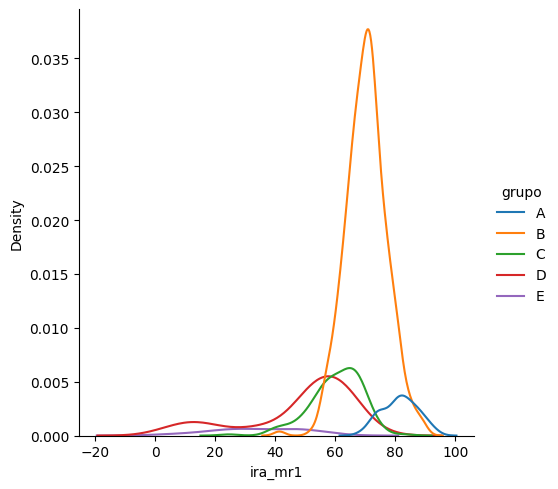

In [17]:
sns.displot(data=planilha_analise, hue='grupo', hue_order=['A', 'B', 'C', 'D', 'E'], x='ira_mr1', kind="kde")

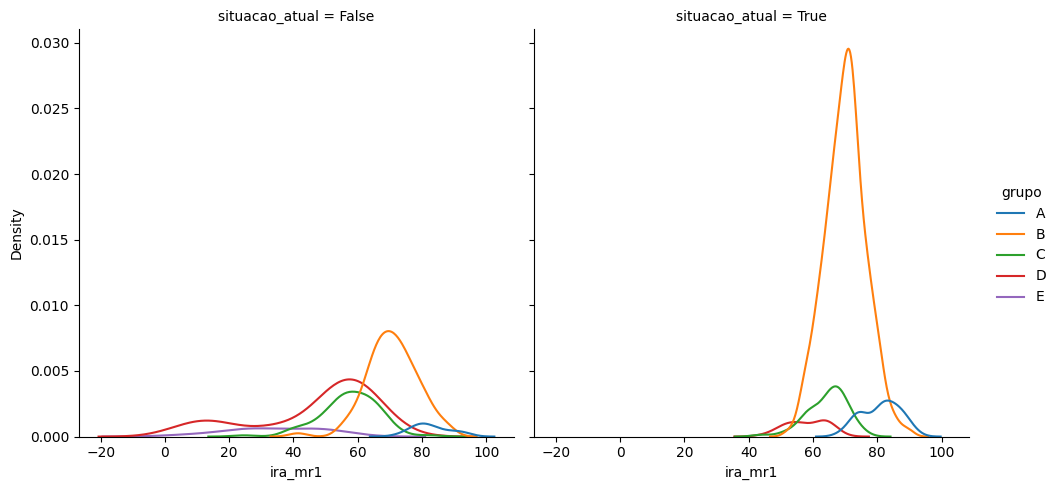

In [18]:
sns.displot(
    data=planilha_analise, 
    hue='grupo', 
    col=(
        (planilha_analise['situacao_atual']=='Concluído') 
        & 
        (planilha_analise['situacao_atual']!='Matriculado')
    ), 
    hue_order=['A', 'B', 'C', 'D', 'E'], 
    x='ira_mr1', 
    kind="kde"
)

In [19]:
print(planilha_analise[planilha_analise['situacao_atual']=='Concluído']['ira_mr1'].std())
print(planilha_analise[planilha_analise['situacao_atual']=='Concluído']['ira_mr1'].mean())


7.630414013639062
69.89867283950616


In [20]:
print(str(len(grupo_a)) + ' registros')
grupo_a[grupo_a['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])

69 registros


/tmp/ipykernel_27508/1953872295.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grupo_a[grupo_a['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])


,ano,periodo,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf
0.25,2015.5,1.0,74.335,75.5475,76.8925,0.0,0.0,15.75,15.75,0.0,0.0,0.0
0.50,2018.0,2.5,79.905,81.6450,81.7500,0.0,0.0,17.00,17.00,0.0,0.0,0.0
0.75,2019.0,3.0,84.985,85.2825,86.1475,0.0,0.0,18.00,18.00,0.0,0.0,0.0


In [21]:
print(str(len(grupo_b)) + ' registros')
grupo_b[grupo_b['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])

685 registros


/tmp/ipykernel_27508/3068378984.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grupo_b[grupo_b['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])


,ano,periodo,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf
0.25,2014.0,2.0,61.83,65.875,65.885,2.0,1.0,15.0,15.0,0.0,0.0,0.0
0.50,2015.0,2.0,66.94,70.180,70.080,3.0,2.0,16.0,16.0,0.0,0.0,0.0
0.75,2017.0,3.0,71.70,73.825,73.375,5.0,4.0,17.0,17.0,0.0,0.0,0.0


In [22]:
print(str(len(grupo_c)) + ' registros')
grupo_c[grupo_c['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])

153 registros


/tmp/ipykernel_27508/764675074.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grupo_c[grupo_c['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])


,ano,periodo,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf
0.25,2016.0,1.0,54.76,59.82,60.31,5.0,4.0,16.0,14.0,1.0,0.0,0.0
0.50,2017.0,2.0,60.74,65.42,64.57,7.0,5.0,17.0,15.0,1.0,0.0,0.0
0.75,2018.0,3.0,65.67,68.44,66.91,9.0,7.0,18.0,16.0,2.0,0.0,0.0


In [23]:
print(str(len(grupo_d)) + ' registros')
grupo_d[grupo_d['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])

200 registros


/tmp/ipykernel_27508/3264406965.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grupo_d[grupo_d['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])


,ano,periodo,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf
0.25,2015.0,1.0,46.99,53.065,54.775,8.0,7.0,16.0,9.5,0.0,4.0,0.0
0.50,2016.0,1.0,53.60,57.500,57.480,10.0,9.0,16.0,10.0,0.0,6.0,0.0
0.75,2017.0,1.0,60.94,64.100,61.085,11.5,10.5,16.0,12.0,0.0,7.0,0.0


In [24]:
print(str(len(grupo_e)) + ' registros')
grupo_e[grupo_e['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])

33 registros


/tmp/ipykernel_27508/1879096397.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grupo_e[grupo_e['situacao_atual']=='Concluído'].quantile([0.25, 0.5, 0.75])


,ano,periodo,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf
0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
